### NLP Assignment 2
Natalie Kim

Identify top-10 tokens that occur in regulation descriptions in the table.

In [1]:
import pandas as pd
import requests

In [2]:
%%time

# Define the API endpoint and parameters
url = "https://data.cityofchicago.org/resource/cwig-ma7x.json"

# Fetch the total count of records
def get_total_count(url):
    params = {
        "$select": "count(*)"
    }
    response = requests.get(url, params=params)
    data = response.json()
    return int(data[0]['count'])

total_count = get_total_count(url)
print(f"Total number of records available: {total_count:,.0f}")

Total number of records available: 285,719
CPU times: user 123 ms, sys: 9.03 ms, total: 132 ms
Wall time: 938 ms


In [3]:
%%time

# Fetch data and load it into a pandas DataFrame
def fetch_data(url, params):
    response = requests.get(url, params=params)
    data = response.json()
    return pd.DataFrame(data)

# Set the limit parameter equal to the number of available records
params = {
    "$limit": total_count
}

# Fetch the data and load it into a DataFrame
df = fetch_data(url, params)

print(f'Number of records retrieved: {df.shape[0]:,.0f}')

Number of records retrieved: 285,719
CPU times: user 4.54 s, sys: 860 ms, total: 5.4 s
Wall time: 32.8 s


In [4]:
df.head(5)

,inspection_id,dba_name,aka_name,license_,risk,address,state,zip,inspection_date,inspection_type,...,location_city,location_state,location_zip,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,facility_type,city
0,2610640,NEKTER JUICE BAR,NEKTER JUICE BAR,2997280,Risk 2 (Medium),1338 S HALSTED ST,IL,60607,2025-01-16T00:00:00.000,License,...,,,,8,14917,29,97,48,NaN,NaN
1,2610631,TEDDY BEAR NURSERY SCHOOLS,TEDDY BEAR NURSERY,2877040,Risk 1 (High),2649 W 51ST ST,IL,60632,2025-01-16T00:00:00.000,License,...,,,,49,22248,61,778,8,Daycare Above and Under 2 Years,CHICAGO
2,2610656,Talcott,Talcott,25581,Risk 1 (High),1840 W Ohio ST,IL,60622,2025-01-16T00:00:00.000,Canvass,...,,,,24,21560,25,519,41,School,CHICAGO
3,2610639,TAQUERIA AY MAMA,TAQUERIA AY MAMA,3007153,Risk 1 (High),3233 W CERMAK RD,IL,60623,2025-01-16T00:00:00.000,License,...,,,,36,21569,32,291,1,Restaurant,CHICAGO
4,2610664,RAFA'S CHICKEN,RAFA'S CHICKEN,2397487,Risk 1 (High),4410 W 63RD ST,IL,60629,2025-01-16T00:00:00.000,Canvass,...,,,,23,21867,63,292,6,Restaurant,CHICAGO


In [5]:
print(df.columns)

Index(['inspection_id', 'dba_name', 'aka_name', 'license_', 'risk', 'address',
       'state', 'zip', 'inspection_date', 'inspection_type', 'results',
       'violations', 'latitude', 'longitude', 'location', 'location_address',
       'location_city', 'location_state', 'location_zip',
       ':@computed_region_awaf_s7ux', ':@computed_region_6mkv_f3dw',
       ':@computed_region_vrxf_vc4k', ':@computed_region_bdys_3d7i',
       ':@computed_region_43wa_7qmu', 'facility_type', 'city'],
      dtype='object')


In [6]:
df = df.iloc[:, :-12]

df.head(5)

,inspection_id,dba_name,aka_name,license_,risk,address,state,zip,inspection_date,inspection_type,results,violations,latitude,longitude
0,2610640,NEKTER JUICE BAR,NEKTER JUICE BAR,2997280,Risk 2 (Medium),1338 S HALSTED ST,IL,60607,2025-01-16T00:00:00.000,License,Fail,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.86440790840258,-87.64698520298732
1,2610631,TEDDY BEAR NURSERY SCHOOLS,TEDDY BEAR NURSERY,2877040,Risk 1 (High),2649 W 51ST ST,IL,60632,2025-01-16T00:00:00.000,License,Pass,16. FOOD-CONTACT SURFACES: CLEANED & SANITIZED...,41.800929053272796,-87.6910729228353
2,2610656,Talcott,Talcott,25581,Risk 1 (High),1840 W Ohio ST,IL,60622,2025-01-16T00:00:00.000,Canvass,Pass,"53. TOILET FACILITIES: PROPERLY CONSTRUCTED, S...",41.89243235095555,-87.67370498741765
3,2610639,TAQUERIA AY MAMA,TAQUERIA AY MAMA,3007153,Risk 1 (High),3233 W CERMAK RD,IL,60623,2025-01-16T00:00:00.000,License,Fail,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.85164288650078,-87.7064081112397
4,2610664,RAFA'S CHICKEN,RAFA'S CHICKEN,2397487,Risk 1 (High),4410 W 63RD ST,IL,60629,2025-01-16T00:00:00.000,Canvass,Pass,47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE...,41.778647086061646,-87.73304626375042


##### 1. Similar to Assignment 1, filter the data for failed inspections and only keep records where Violations description is not blank. 

In [7]:
# Filtering data for failed inspections
df_failed = df[df['results'] == 'Fail']

df_failed.head()

,inspection_id,dba_name,aka_name,license_,risk,address,state,zip,inspection_date,inspection_type,results,violations,latitude,longitude
0,2610640,NEKTER JUICE BAR,NEKTER JUICE BAR,2997280,Risk 2 (Medium),1338 S HALSTED ST,IL,60607,2025-01-16T00:00:00.000,License,Fail,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.86440790840258,-87.64698520298732
3,2610639,TAQUERIA AY MAMA,TAQUERIA AY MAMA,3007153,Risk 1 (High),3233 W CERMAK RD,IL,60623,2025-01-16T00:00:00.000,License,Fail,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.85164288650078,-87.7064081112397
5,2610687,HNDOCU.COM LLC,HNDOCU.COM LLC,2890658,Risk 3 (Low),821 VAN BUREN,IL,60607,2025-01-16T00:00:00.000,License,Fail,5. PROCEDURES FOR RESPONDING TO VOMITING AND D...,NaN,NaN
6,2610671,PIZZA-METRO,PIZZA-METRO,1545880,Risk 1 (High),1707 W DIVISION ST,IL,60622,2025-01-16T00:00:00.000,Canvass,Fail,2. CITY OF CHICAGO FOOD SERVICE SANITATION CER...,41.90319053056459,-87.67029008677447
11,2610681,2D RESTAURANT,2D RESTAURANT,2808226,Risk 1 (High),3155 N HALSTED ST,IL,60657,2025-01-16T00:00:00.000,Complaint,Fail,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.93944115701468,-87.64910277148812


In [8]:
df_failed.shape[0]

55485

In [21]:
# Remove blank Violations
df_clean = df_failed.dropna(subset=['violations'])

df_clean.shape[0]

51969

In [10]:
pd.options.display.max_colwidth = None
print(df_clean['violations'].head(1))

0    10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE - Comments: OBSERVED A HAND WASHING SINK IS NEEDED AT DISHWASHING/FOOD PREP AREA. INSTRUCTED TO PROVIDE. PRIORITY FOUNDATION VIOLATION #7-38-030(C)
Name: violations, dtype: object


In [11]:
pd.reset_option('display.max_colwidth')

##### 2. Using regex, separate the violation description and comments into separate data frame columns.

In [12]:
import re

In [13]:
# sample violation
sv = "10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED AND ACCESSIBLE - Comments: OBSERVED A HAND WASHING SINK IS NEEDED AT DISHWASHING/FOOD PREP AREA. INSTRUCTED TO PROVIDE. PRIORITY FOUNDATION VIOLATION #7-38-030(C)"
sc = re.search(r'\d+\.\s.*?\s-\sComments:\s(.*?)(?=$|\|)', sv)

if sc:
    print(sc.group(1))  # This will print the extracted comment
else:
    print("No match found")

OBSERVED A HAND WASHING SINK IS NEEDED AT DISHWASHING/FOOD PREP AREA. INSTRUCTED TO PROVIDE. PRIORITY FOUNDATION VIOLATION #7-38-030(C)


In [14]:
# extract regulation descriptions and comments
def extract_desc_comm(violations):
    # splitting on '|' to separate violations
    violation_entries = violations.split('|')

    descriptions = []
    comments = []

    for entry in violation_entries:
        # description after code & '.' and before '-'
        desc_match = re.search(r'\d+\.\s(.*?)(?:\s-\s|$)', entry)
        if desc_match:
            descriptions.append(desc_match.group(1).strip())

        # comment after 'Comments: ' and before '|'
        comm_match = re.search(r'\d+\.\s.*?\s-\sComments:\s(.*?)(?=$|\|)', entry)
        if comm_match:
            comments.append(comm_match.group(1).strip())

    return descriptions, comments

In [22]:
# Violation description column
df_clean[['violation_description', 'violation_comments']] = df_clean['violations'].apply(
    lambda x: pd.Series(extract_desc_comm(x))
)

df_clean.head(3)

/var/folders/t6/n_h66qsx6rz5862xz5zck5sm0000gq/T/ipykernel_73897/810638998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[['violation_description', 'violation_comments']] = df_clean['violations'].apply(
/var/folders/t6/n_h66qsx6rz5862xz5zck5sm0000gq/T/ipykernel_73897/810638998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[['violation_description', 'violation_comments']] = df_clean['violations'].apply(


,inspection_id,dba_name,aka_name,license_,risk,address,state,zip,inspection_date,inspection_type,results,violations,latitude,longitude,violation_description,violation_comments
0,2610640,NEKTER JUICE BAR,NEKTER JUICE BAR,2997280,Risk 2 (Medium),1338 S HALSTED ST,IL,60607,2025-01-16T00:00:00.000,License,Fail,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.86440790840258,-87.64698520298732,[ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED ...,[OBSERVED A HAND WASHING SINK IS NEEDED AT DIS...
3,2610639,TAQUERIA AY MAMA,TAQUERIA AY MAMA,3007153,Risk 1 (High),3233 W CERMAK RD,IL,60623,2025-01-16T00:00:00.000,License,Fail,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.85164288650078,-87.7064081112397,[ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED ...,[OBSERVED NO HAND CLEANSER AVAILABLE AT WASHBO...
5,2610687,HNDOCU.COM LLC,HNDOCU.COM LLC,2890658,Risk 3 (Low),821 VAN BUREN,IL,60607,2025-01-16T00:00:00.000,License,Fail,5. PROCEDURES FOR RESPONDING TO VOMITING AND D...,NaN,NaN,[PROCEDURES FOR RESPONDING TO VOMITING AND DIA...,[OBSERVED FACILITY WITHOUT A BODILY FLUID SPIL...


##### 3. Tokenize violation description and comment columns

In [18]:
import nltk as nltk
import nltk.corpus
from nltk.text import Text
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [23]:
# tokenize description column
df_clean['desc_tokens'] = df_clean['violation_description'].apply(
    lambda desc_list: [word_tokenize(desc) for desc in desc_list]
)

/var/folders/t6/n_h66qsx6rz5862xz5zck5sm0000gq/T/ipykernel_73897/430825568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['desc_tokens'] = df_clean['violation_description'].apply(


In [24]:
# tokenize comment column
df_clean['comm_tokens'] = df_clean['violation_comments'].apply(
    lambda comm_list: [word_tokenize(comm) for comm in comm_list]
)

/var/folders/t6/n_h66qsx6rz5862xz5zck5sm0000gq/T/ipykernel_73897/1466736243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['comm_tokens'] = df_clean['violation_comments'].apply(


In [25]:
df_clean.head(3)

,inspection_id,dba_name,aka_name,license_,risk,address,state,zip,inspection_date,inspection_type,results,violations,latitude,longitude,violation_description,violation_comments,desc_tokens,comm_tokens
0,2610640,NEKTER JUICE BAR,NEKTER JUICE BAR,2997280,Risk 2 (Medium),1338 S HALSTED ST,IL,60607,2025-01-16T00:00:00.000,License,Fail,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.86440790840258,-87.64698520298732,[ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED ...,[OBSERVED A HAND WASHING SINK IS NEEDED AT DIS...,"[[ADEQUATE, HANDWASHING, SINKS, PROPERLY, SUPP...","[[OBSERVED, A, HAND, WASHING, SINK, IS, NEEDED..."
3,2610639,TAQUERIA AY MAMA,TAQUERIA AY MAMA,3007153,Risk 1 (High),3233 W CERMAK RD,IL,60623,2025-01-16T00:00:00.000,License,Fail,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.85164288650078,-87.7064081112397,[ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED ...,[OBSERVED NO HAND CLEANSER AVAILABLE AT WASHBO...,"[[ADEQUATE, HANDWASHING, SINKS, PROPERLY, SUPP...","[[OBSERVED, NO, HAND, CLEANSER, AVAILABLE, AT,..."
5,2610687,HNDOCU.COM LLC,HNDOCU.COM LLC,2890658,Risk 3 (Low),821 VAN BUREN,IL,60607,2025-01-16T00:00:00.000,License,Fail,5. PROCEDURES FOR RESPONDING TO VOMITING AND D...,NaN,NaN,[PROCEDURES FOR RESPONDING TO VOMITING AND DIA...,[OBSERVED FACILITY WITHOUT A BODILY FLUID SPIL...,"[[PROCEDURES, FOR, RESPONDING, TO, VOMITING, A...","[[OBSERVED, FACILITY, WITHOUT, A, BODILY, FLUI..."


In [27]:
pd.options.display.max_colwidth = None
print(df_clean['comm_tokens'].head(1))
pd.reset_option('display.max_colwidth')

0    [[OBSERVED, A, HAND, WASHING, SINK, IS, NEEDED, AT, DISHWASHING/FOOD, PREP, AREA, ., INSTRUCTED, TO, PROVIDE, ., PRIORITY, FOUNDATION, VIOLATION, #, 7-38-030, (, C, )]]
Name: comm_tokens, dtype: object


##### 4. Find top-10 tokens of each column

In [29]:
# token column is list within list, so we need to flatten it
desc_tokens = [token for row in df_clean['desc_tokens'] for sublist in row for token in sublist]

desc_fdist = nltk.FreqDist(desc_tokens)
desc_fdist.most_common(10)

[(',', 388851),
 ('AND', 176516),
 (':', 132133),
 ('&', 95788),
 ('FOOD', 94772),
 ('MAINTAINED', 94146),
 ('PROPERLY', 81193),
 ('CLEAN', 76455),
 ('INSTALLED', 74613),
 ('CONSTRUCTED', 70689)]

In [30]:
comm_tokens = [token for row in df_clean['comm_tokens'] for sublist in row for token in sublist]

comm_fdist = nltk.FreqDist(comm_tokens)
comm_fdist.most_common(10)

[('.', 800636),
 ('AND', 408416),
 (',', 374674),
 ('THE', 306130),
 ('IN', 272254),
 ('TO', 264966),
 ('OF', 178846),
 ('MUST', 161386),
 ('ON', 157952),
 ('INSTRUCTED', 147956)]

##### 5. Clean each column: convert to lower case, remove stopwords, punctuation, numbers, etc

In [36]:
## Descriptions Column

# english stopwords
stopwords = set(nltk.corpus.stopwords.words('english'))

# flatten and clean tokens in desc_tokens
def clean_tokens(tokens_column):
    flattened_tokens = [
        token for sublist in tokens_column for token in sublist
    ]

    # remove punctuation, numbers, and single-character tokens
    cleaned_tokens = [
        token for token in flattened_tokens
        if len(token) > 1 and token.isalpha() and not token.isnumeric()
    ]

    # convert to lowercase
    cleaned_tokens = [token.lower() for token in cleaned_tokens]

    # remove stopwords
    cleaned_tokens = [token for token in cleaned_tokens if token not in stopwords]

    return cleaned_tokens


In [37]:
# clean description tokens
df_clean['cleaned_desc_tokens'] = df_clean['desc_tokens'].apply(clean_tokens)

# clean comment tokens
df_clean['cleaned_comm_tokens'] = df_clean['comm_tokens'].apply(clean_tokens)

/var/folders/t6/n_h66qsx6rz5862xz5zck5sm0000gq/T/ipykernel_73897/3079119990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cleaned_desc_tokens'] = df_clean['desc_tokens'].apply(clean_tokens)
/var/folders/t6/n_h66qsx6rz5862xz5zck5sm0000gq/T/ipykernel_73897/3079119990.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cleaned_comm_tokens'] = df_clean['comm_tokens'].apply(clean_tokens)


In [40]:
pd.options.display.max_colwidth = None
print(df_clean['cleaned_comm_tokens'].head(1))
pd.reset_option('display.max_colwidth')

0    [observed, hand, washing, sink, needed, prep, area, instructed, provide, priority, foundation, violation]
Name: cleaned_comm_tokens, dtype: object


##### 6. Find top-10 tokens again

In [41]:
# token column is list, so we need to flatten it
clean_desc_tokens = [token for row in df_clean['cleaned_desc_tokens'] for token in row]

# top 10 description tokens
desc_fdist2 = nltk.FreqDist(clean_desc_tokens)
desc_fdist2.most_common(10)

[('food', 94772),
 ('maintained', 94146),
 ('properly', 81193),
 ('clean', 76455),
 ('installed', 74613),
 ('constructed', 70689),
 ('equipment', 65489),
 ('surfaces', 55279),
 ('contact', 51044),
 ('cleaning', 48295)]

In [42]:
# flatten comm list
clean_comm_tokens = [token for row in df_clean['cleaned_comm_tokens'] for token in row]

# top 10 comment tokens
comm_fdist2 = nltk.FreqDist(clean_comm_tokens)
comm_fdist2.most_common(10)

[('must', 170941),
 ('instructed', 154983),
 ('food', 148150),
 ('observed', 145834),
 ('clean', 121226),
 ('area', 114299),
 ('maintain', 100101),
 ('prep', 92250),
 ('sink', 91400),
 ('provide', 82752)]

##### 7. Find top-10 tokens after applying Porter stemming to the columns obtained in step 5.

In [43]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

In [44]:
print(clean_desc_tokens[:10])

['adequate', 'handwashing', 'sinks', 'properly', 'supplied', 'accessible', 'adequate', 'handwashing', 'sinks', 'properly']


In [46]:
def porter_stem_tokens(tokens):
    return [porter.stem(token) for token in tokens]

In [47]:
# Porter Stemming on Description Tokens
df_clean['porter_desc_tokens'] = df_clean['cleaned_desc_tokens'].apply(porter_stem_tokens)

# Porter Stemming on Comments Tokens
df_clean['porter_comm_tokens'] = df_clean['cleaned_comm_tokens'].apply(porter_stem_tokens)

/var/folders/t6/n_h66qsx6rz5862xz5zck5sm0000gq/T/ipykernel_73897/680669319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['porter_desc_tokens'] = df_clean['cleaned_desc_tokens'].apply(porter_stem_tokens)
/var/folders/t6/n_h66qsx6rz5862xz5zck5sm0000gq/T/ipykernel_73897/680669319.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['porter_comm_tokens'] = df_clean['cleaned_comm_tokens'].apply(porter_stem_tokens)


In [48]:
# flatten porter desc list
all_porter_desc_tokens = [token for row in df_clean['porter_desc_tokens'] for token in row]

porter_desc_fdist = nltk.FreqDist(all_porter_desc_tokens)
porter_desc_fdist.most_common(10)

[('clean', 153466),
 ('food', 100028),
 ('maintain', 97695),
 ('properli', 81193),
 ('instal', 74613),
 ('construct', 70689),
 ('equip', 65489),
 ('surfac', 55279),
 ('contact', 51044),
 ('use', 47225)]

In [49]:
# flatten porter comm list
all_porter_comm_tokens = [token for row in df_clean['porter_comm_tokens'] for token in row]

porter_comm_fdist = nltk.FreqDist(all_porter_comm_tokens)
porter_comm_fdist.most_common(10)

[('food', 176404),
 ('must', 170946),
 ('area', 156055),
 ('instruct', 155221),
 ('clean', 149262),
 ('observ', 146366),
 ('maintain', 111612),
 ('sink', 109904),
 ('floor', 100910),
 ('provid', 96036)]

##### 8. Find top-10 tokens after applying Lancaster stemming to the columns obtained in step 5.

In [50]:
# Lancaster Stemmer on Descriptions
def lancaster_stem_tokens(tokens):
    return [lancaster.stem(token) for token in tokens]

In [51]:
# Lancaster Stemming on Description Tokens
df_clean['lancaster_desc_tokens'] = df_clean['cleaned_desc_tokens'].apply(lancaster_stem_tokens)

# Lancaster Stemming on Comments Tokens
df_clean['lancaster_comm_tokens'] = df_clean['cleaned_comm_tokens'].apply(lancaster_stem_tokens)

/var/folders/t6/n_h66qsx6rz5862xz5zck5sm0000gq/T/ipykernel_73897/3570588314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['lancaster_desc_tokens'] = df_clean['cleaned_desc_tokens'].apply(lancaster_stem_tokens)
/var/folders/t6/n_h66qsx6rz5862xz5zck5sm0000gq/T/ipykernel_73897/3570588314.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['lancaster_comm_tokens'] = df_clean['cleaned_comm_tokens'].apply(lancaster_stem_tokens)


In [52]:
# flatten lancaster description list
all_lancaster_desc_tokens = [token for row in df_clean['lancaster_desc_tokens'] for token in row]

lancaster_desc_fdist = nltk.FreqDist(all_lancaster_desc_tokens)
lancaster_desc_fdist.most_common(10)

[('cle', 164869),
 ('prop', 101432),
 ('food', 100028),
 ('maintain', 97695),
 ('instal', 74613),
 ('construct', 70689),
 ('equip', 65489),
 ('surfac', 55279),
 ('contact', 51044),
 ('us', 47225)]

In [53]:
# flatten lancaster comment list
all_lancaster_comm_tokens = [token for row in df_clean['lancaster_comm_tokens'] for token in row]

lancaster_comm_fdist = nltk.FreqDist(all_lancaster_comm_tokens)
lancaster_comm_fdist.most_common(10)

[('food', 176405),
 ('must', 170948),
 ('cle', 162829),
 ('instruct', 155255),
 ('observ', 146365),
 ('are', 114299),
 ('prep', 111915),
 ('maintain', 111626),
 ('sink', 109906),
 ('stor', 107130)]

##### 9. Find top-10 tokens after applying lemmatization to the columns obtained in step 5.

In [60]:
from nltk.stem import WordNetLemmatizer
wnl = nltk.WordNetLemmatizer()

In [61]:
# Lemmatization on Descriptions
def lemmatize_tokens(tokens):
    return [wnl.lemmatize(token) for token in tokens]

In [67]:
df_clean['cleaned_desc_tokens'][0]

['adequate', 'handwashing', 'sinks', 'properly', 'supplied', 'accessible']

In [68]:
print([wnl.lemmatize(t) for t in df_clean['cleaned_desc_tokens'][0]])

['adequate', 'handwashing', 'sink', 'properly', 'supplied', 'accessible']


In [69]:
# Lemmatization on Description Tokens
df_clean['lemmatized_desc_tokens'] = df_clean['cleaned_desc_tokens'].apply(lemmatize_tokens)

# Lemmatization on Comments Tokens
df_clean['lemmatized_comm_tokens'] = df_clean['cleaned_comm_tokens'].apply(lemmatize_tokens)

/var/folders/t6/n_h66qsx6rz5862xz5zck5sm0000gq/T/ipykernel_73897/105195305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['lemmatized_desc_tokens'] = df_clean['cleaned_desc_tokens'].apply(lemmatize_tokens)
/var/folders/t6/n_h66qsx6rz5862xz5zck5sm0000gq/T/ipykernel_73897/105195305.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['lemmatized_comm_tokens'] = df_clean['cleaned_comm_tokens'].apply(lemmatize_tokens)


In [70]:
# flatten lemmatized description list
all_lemmatized_desc_tokens = [token for row in df_clean['lemmatized_desc_tokens'] for token in row]

lemmatized_desc_fdist = nltk.FreqDist(all_lemmatized_desc_tokens)
lemmatized_desc_fdist.most_common(10)

[('food', 100028),
 ('maintained', 94146),
 ('properly', 81193),
 ('clean', 76455),
 ('installed', 74613),
 ('constructed', 70689),
 ('equipment', 65489),
 ('surface', 55279),
 ('contact', 51044),
 ('cleaning', 48295)]

In [71]:
# flatten lemmatized comment list
all_lemmatized_comm_tokens = [token for row in df_clean['lemmatized_comm_tokens'] for token in row]

lemmatized_comm_fdist = nltk.FreqDist(all_lemmatized_comm_tokens)
lemmatized_comm_fdist.most_common(10)

[('food', 176403),
 ('must', 170945),
 ('area', 156056),
 ('instructed', 154983),
 ('observed', 145834),
 ('clean', 121233),
 ('sink', 109903),
 ('floor', 100499),
 ('maintain', 100101),
 ('prep', 92264)]

##### 10. Compare top-10 tokens obtained in 4, 6, 7, 8, 9.

In [79]:
# 4: desc_fdist.most_common(10) and comm_fdist.most_common(10)
# 6: desc_fdist2.most_common(10) and comm_fdist2.most_common(10)
# 7: porter_desc_fdist.most_common(10) and porter_comm_fdist.most_common(10)
# 8: lancaster_desc_fdist.most_common(10) and lancaster_comm_fdist.most_common(10)
# 9: lemmatized_desc_fdist.most_common(10) and lemmatized_comm_fdist.most_common(10)

# combining all the top 10 tokens of descriptions in one dataframe
top_10_desc_tokens = pd.DataFrame({
    'raw_token': [token for token, freq in desc_fdist.most_common(10)],
    'clean_token': [token for token, freq in desc_fdist2.most_common(10)],
    'porter_token': [token for token, freq in porter_desc_fdist.most_common(10)],
    'lancaster_token': [token for token, freq in lancaster_desc_fdist.most_common(10)],
    'lemmatized_token': [token for token, freq in lemmatized_desc_fdist.most_common(10)]
})

print(top_10_desc_tokens)

     raw_token  clean_token porter_token lancaster_token lemmatized_token
0            ,         food        clean             cle             food
1          AND   maintained         food            prop       maintained
2            :     properly     maintain            food         properly
3            &        clean     properli        maintain            clean
4         FOOD    installed       instal          instal        installed
5   MAINTAINED  constructed    construct       construct      constructed
6     PROPERLY    equipment        equip           equip        equipment
7        CLEAN     surfaces       surfac          surfac          surface
8    INSTALLED      contact      contact         contact          contact
9  CONSTRUCTED     cleaning          use              us         cleaning


In [80]:
# combining all the top 10 tokens of comments in one dataframe
top_10_comm_tokens = pd.DataFrame({
    'raw_token': [token for token, freq in comm_fdist.most_common(10)],
    'clean_token': [token for token, freq in comm_fdist2.most_common(10)],
    'porter_token': [token for token, freq in porter_comm_fdist.most_common(10)],
    'lancaster_token': [token for token, freq in lancaster_comm_fdist.most_common(10)],
    'lemmatized_token': [token for token, freq in lemmatized_comm_fdist.most_common(10)]
})

print(top_10_comm_tokens)

    raw_token clean_token porter_token lancaster_token lemmatized_token
0           .        must         food            food             food
1         AND  instructed         must            must             must
2           ,        food         area             cle             area
3         THE    observed     instruct        instruct       instructed
4          IN       clean        clean          observ         observed
5          TO        area       observ             are            clean
6          OF    maintain     maintain            prep             sink
7        MUST        prep         sink        maintain            floor
8          ON        sink        floor            sink         maintain
9  INSTRUCTED     provide       provid            stor             prep


The raw tokens (#4) contained mostly punctuation and stopwords.

Once removed and cleaned (#6) the most frequent list of tokens gives roughly a good idea to us of what the comments and description are about.

For the descriptions, the lemmatized tokens from (#9) are almost exactly the same as the original cleaned tokens except for one difference: ‘surfaces’ vs ‘surface’. One thing immediately noticed is that the lemmatization didn’t combine words such as ‘clean’ and ‘cleaning’ because of the parts of speech. Without the parts of speech tagging, 'cleaning' is assumed to be a noun as opposed to a verb. Due to this, we can see that the stemmers (#7 & #8) captured the lemma of ‘clean’ or (‘cle’ for Lancaster) as the most common token. ‘cle’ is likely too small of a token that captured more words outside of the word ‘clean’. We can confirm this looking at the frequency numbers of ‘clean’ vs ‘cle’. The stemmers top list suggests a bigger emphasis on the cleanliness in the regulations as opposed to being centered around food. However, overall all methods mainly keep up a general understanding that the regulation descriptions around maintaining cleanliness and properly installing/constructing the equipment and surfaces.

Unlike the descriptions, the lemmatized version of the comment tokens are more aligned with the stemmed tokens than the cleaned_tokens. All three found that ‘food’ and ‘must’ were the first and second tokens, respectively. The Lancaster stemming of ‘cle’ also impacted the top tokens list of the comments. ‘cle’ appeared as the third top token but only as the fifth and sixth most frequent tokens for the Porter stemmer and Lemmatizer, respectively. Words such as ‘must’, ‘instruct/instructed’ suggest that many of the restaurants still needed to take actions - which makes sense given all of these restaurants failed their inspections. However, other than these observations, it’s difficult to tell the sentiment of the comments. For example the word ‘clean’ could be in reference to either a present state or an instruction.

##### 11. Describe which approach provided the most comprehensive view of violations / comments and why

The lemmatized tokens appear to provide a more comprehensive view of both violation descriptions and comments. This is mainly because it produces real words as opposed to the stemmers’ non-words such as ‘properli’ and ‘surfac’. Additionally, but cutting off too much of some words such as ‘equipment’ to ‘equip’, the true meaning of the use of these words is changed. 

##### 12. Use the "most effective" cleaning approach to plot the distribution of most common tokens (belonging to violation description) over time

In [81]:
# extract years of inspections
df_clean.loc[:,'inspection_year'] = pd.to_datetime(df_clean['inspection_date']).dt.year

df_clean.head(3)

/var/folders/t6/n_h66qsx6rz5862xz5zck5sm0000gq/T/ipykernel_73897/3013802790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:,'inspection_year'] = pd.to_datetime(df_clean['inspection_date']).dt.year


,inspection_id,dba_name,aka_name,license_,risk,address,state,zip,inspection_date,inspection_type,...,comm_tokens,cleaned_desc_tokens,cleaned_comm_tokens,porter_desc_tokens,porter_comm_tokens,lancaster_desc_tokens,lancaster_comm_tokens,lemmatized_desc_tokens,lemmatized_comm_tokens,inspection_year
0,2610640,NEKTER JUICE BAR,NEKTER JUICE BAR,2997280,Risk 2 (Medium),1338 S HALSTED ST,IL,60607,2025-01-16T00:00:00.000,License,...,"[[OBSERVED, A, HAND, WASHING, SINK, IS, NEEDED...","[adequate, handwashing, sinks, properly, suppl...","[observed, hand, washing, sink, needed, prep, ...","[adequ, handwash, sink, properli, suppli, access]","[observ, hand, wash, sink, need, prep, area, i...","[adequ, handwash, sink, prop, supply, access]","[observ, hand, wash, sink, nee, prep, are, ins...","[adequate, handwashing, sink, properly, suppli...","[observed, hand, washing, sink, needed, prep, ...",2025
3,2610639,TAQUERIA AY MAMA,TAQUERIA AY MAMA,3007153,Risk 1 (High),3233 W CERMAK RD,IL,60623,2025-01-16T00:00:00.000,License,...,"[[OBSERVED, NO, HAND, CLEANSER, AVAILABLE, AT,...","[adequate, handwashing, sinks, properly, suppl...","[observed, hand, cleanser, available, washbowl...","[adequ, handwash, sink, properli, suppli, acce...","[observ, hand, cleanser, avail, washbowl, toil...","[adequ, handwash, sink, prop, supply, access, ...","[observ, hand, cleans, avail, washbowl, toilet...","[adequate, handwashing, sink, properly, suppli...","[observed, hand, cleanser, available, washbowl...",2025
5,2610687,HNDOCU.COM LLC,HNDOCU.COM LLC,2890658,Risk 3 (Low),821 VAN BUREN,IL,60607,2025-01-16T00:00:00.000,License,...,"[[OBSERVED, FACILITY, WITHOUT, A, BODILY, FLUI...","[procedures, responding, vomiting, diarrheal, ...","[observed, facility, without, bodily, fluid, s...","[procedur, respond, vomit, diarrheal, event, p...","[observ, facil, without, bodili, fluid, spill,...","[proc, respond, vomit, diarrh, ev, prop, cool,...","[observ, facil, without, body, fluid, spil, ki...","[procedure, responding, vomiting, diarrheal, e...","[observed, facility, without, bodily, fluid, s...",2025


In [84]:
top_lemmatized_tokens = top_10_desc_tokens['lemmatized_token'].tolist()
top_lemmatized_tokens

['food',
 'maintained',
 'properly',
 'clean',
 'installed',
 'constructed',
 'equipment',
 'surface',
 'contact',
 'cleaning']

In [86]:
lemm_exploded = df_clean.explode('lemmatized_desc_tokens')

# filter for only top ten tokens
top_ten_dates = lemm_exploded[
    lemm_exploded['lemmatized_desc_tokens'].isin(top_lemmatized_tokens)
]

top_ten_dates.head()

,inspection_id,dba_name,aka_name,license_,risk,address,state,zip,inspection_date,inspection_type,...,comm_tokens,cleaned_desc_tokens,cleaned_comm_tokens,porter_desc_tokens,porter_comm_tokens,lancaster_desc_tokens,lancaster_comm_tokens,lemmatized_desc_tokens,lemmatized_comm_tokens,inspection_year
0,2610640,NEKTER JUICE BAR,NEKTER JUICE BAR,2997280,Risk 2 (Medium),1338 S HALSTED ST,IL,60607,2025-01-16T00:00:00.000,License,...,"[[OBSERVED, A, HAND, WASHING, SINK, IS, NEEDED...","[adequate, handwashing, sinks, properly, suppl...","[observed, hand, washing, sink, needed, prep, ...","[adequ, handwash, sink, properli, suppli, access]","[observ, hand, wash, sink, need, prep, area, i...","[adequ, handwash, sink, prop, supply, access]","[observ, hand, wash, sink, nee, prep, are, ins...",properly,"[observed, hand, washing, sink, needed, prep, ...",2025
3,2610639,TAQUERIA AY MAMA,TAQUERIA AY MAMA,3007153,Risk 1 (High),3233 W CERMAK RD,IL,60623,2025-01-16T00:00:00.000,License,...,"[[OBSERVED, NO, HAND, CLEANSER, AVAILABLE, AT,...","[adequate, handwashing, sinks, properly, suppl...","[observed, hand, cleanser, available, washbowl...","[adequ, handwash, sink, properli, suppli, acce...","[observ, hand, cleanser, avail, washbowl, toil...","[adequ, handwash, sink, prop, supply, access, ...","[observ, hand, cleans, avail, washbowl, toilet...",properly,"[observed, hand, cleanser, available, washbowl...",2025
3,2610639,TAQUERIA AY MAMA,TAQUERIA AY MAMA,3007153,Risk 1 (High),3233 W CERMAK RD,IL,60623,2025-01-16T00:00:00.000,License,...,"[[OBSERVED, NO, HAND, CLEANSER, AVAILABLE, AT,...","[adequate, handwashing, sinks, properly, suppl...","[observed, hand, cleanser, available, washbowl...","[adequ, handwash, sink, properli, suppli, acce...","[observ, hand, cleanser, avail, washbowl, toil...","[adequ, handwash, sink, prop, supply, access, ...","[observ, hand, cleans, avail, washbowl, toilet...",equipment,"[observed, hand, cleanser, available, washbowl...",2025
3,2610639,TAQUERIA AY MAMA,TAQUERIA AY MAMA,3007153,Risk 1 (High),3233 W CERMAK RD,IL,60623,2025-01-16T00:00:00.000,License,...,"[[OBSERVED, NO, HAND, CLEANSER, AVAILABLE, AT,...","[adequate, handwashing, sinks, properly, suppl...","[observed, hand, cleanser, available, washbowl...","[adequ, handwash, sink, properli, suppli, acce...","[observ, hand, cleanser, avail, washbowl, toil...","[adequ, handwash, sink, prop, supply, access, ...","[observ, hand, cleans, avail, washbowl, toilet...",properly,"[observed, hand, cleanser, available, washbowl...",2025
3,2610639,TAQUERIA AY MAMA,TAQUERIA AY MAMA,3007153,Risk 1 (High),3233 W CERMAK RD,IL,60623,2025-01-16T00:00:00.000,License,...,"[[OBSERVED, NO, HAND, CLEANSER, AVAILABLE, AT,...","[adequate, handwashing, sinks, properly, suppl...","[observed, hand, cleanser, available, washbowl...","[adequ, handwash, sink, properli, suppli, acce...","[observ, hand, cleanser, avail, washbowl, toil...","[adequ, handwash, sink, prop, supply, access, ...","[observ, hand, cleans, avail, washbowl, toilet...",constructed,"[observed, hand, cleanser, available, washbowl...",2025


In [87]:
# group by year and regulation description & count
top_tokens_years = top_ten_dates.groupby(['inspection_year','lemmatized_desc_tokens']).size().reset_index(name='count')

top_tokens_years.head()

,inspection_year,lemmatized_desc_tokens,count
0,2010,clean,5373
1,2010,cleaning,6016
2,2010,constructed,6776
3,2010,contact,3781
4,2010,equipment,7727


<Figure size 1200x600 with 0 Axes>

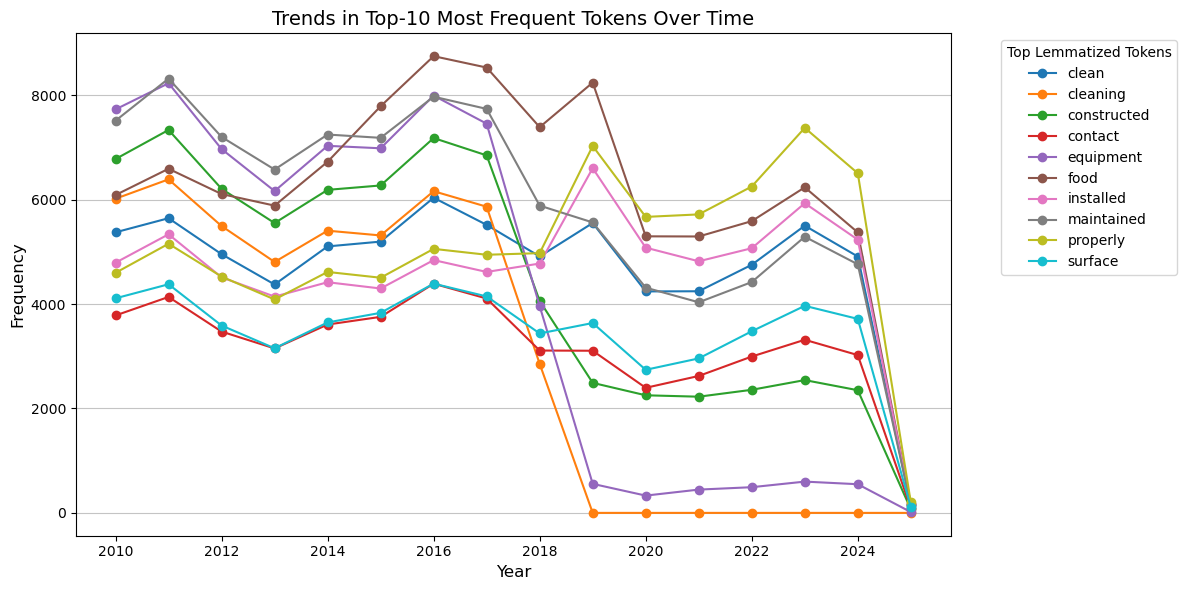

In [89]:
import matplotlib.pyplot as plt

# Visualization: Line chart for trends over time
violation_trends_pivot = top_tokens_years.pivot(index='inspection_year', columns='lemmatized_desc_tokens', values='count').fillna(0)
plt.figure(figsize=(12, 6))
violation_trends_pivot.plot(marker='o', figsize=(12, 6))
plt.title('Trends in Top-10 Most Frequent Tokens Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Top Lemmatized Tokens', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()